In [50]:
import pandas as pd
import numpy as np

df = pd.read_csv('dataset/medical_insurance.csv')

print(df.columns) # Display the column names
print("\n") 
print("Available data types are:") 
print(df.dtypes) # Display the data types of each column
#print(df.head()) # Display the first 5 rows of the dataframe


df.isnull().sum() # Check for missing values


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


Available data types are:
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
# Exploratory Data Analysis (EDA)
# Identify the attributes that most affect medical charges
import matplotlib.pyplot as plt
import seaborn as sns

print(df.describe())


In [ ]:
# Correlation matrix
corr = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=2)
plt.show()



In [30]:
# Identifying categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# One-hot encode the categorical columns
data_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Display the first few rows of the encoded dataframe
data_encoded.head()

data_encoded.to_csv('dataset/medical_insurance_encoded.csv', index=False)


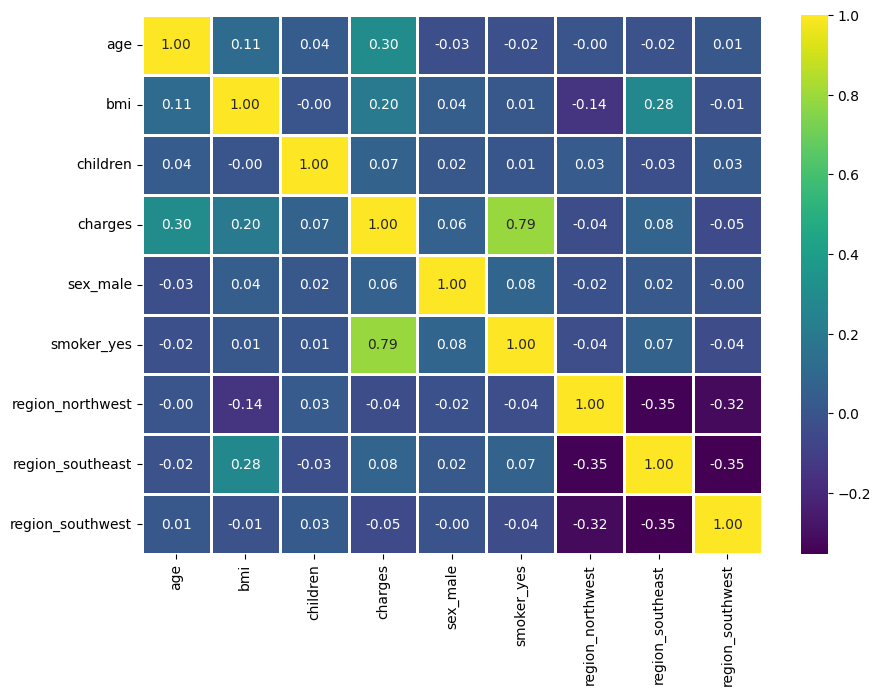

charges             1.000000
smoker_yes          0.788783
age                 0.298624
bmi                 0.199846
region_southeast    0.075652
children            0.066442
sex_male            0.062837
region_southwest    0.051686
region_northwest    0.036874
Name: charges, dtype: float64


In [47]:
# Correlation matrix
corr = data_encoded.corr()
plt.figure(figsize=(10, 7))
sns.heatmap(corr, annot=True, cmap='viridis', fmt='.2f', linewidths=2)
plt.show()


# Correlation with the target variable
corr_target = abs(corr['charges'])
print(corr_target.sort_values(ascending=False))


In [ ]:
# Pairplot for visualizing the distribution and relationships
sns.pairplot(data_encoded)
plt.show()

In [58]:
# Assuming 'data_encoded' is your DataFrame and 'charges' is your target variable
corr_matrix = data_encoded.corr()
strong_corr_features = corr_matrix[corr_matrix['charges'] > 0.5].index.drop('charges')
print("Features with strong positive correlation:", strong_corr_features.tolist())


Features with strong positive correlation: ['smoker_yes']


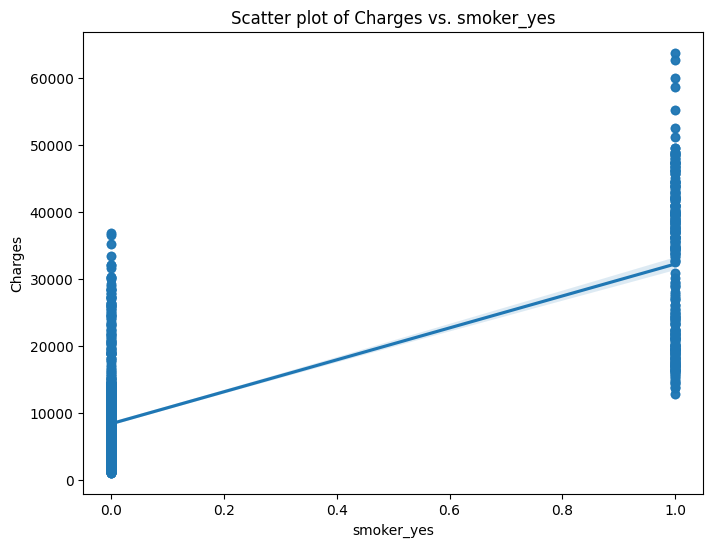

In [65]:

# Plotting
for feature in strong_corr_features:
    plt.figure(figsize=(8, 6))
    sns.regplot(x=data_encoded['feature'], y=data_encoded['charges'])
    plt.title(f'Scatter plot of Charges vs. {feature}')
    plt.xlabel(feature)
    plt.ylabel('Charges')
    plt.show()


(0.0, 66902.8557155)

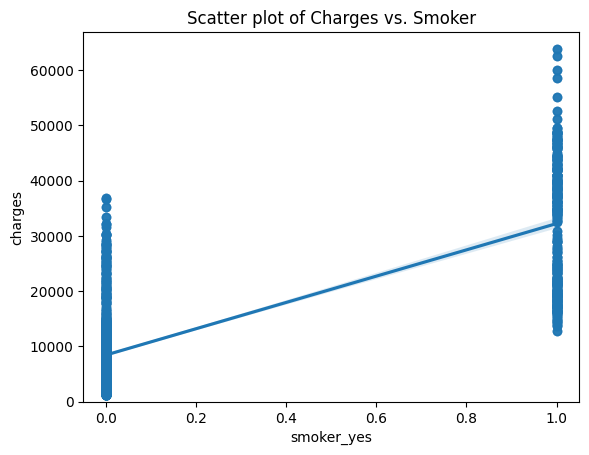

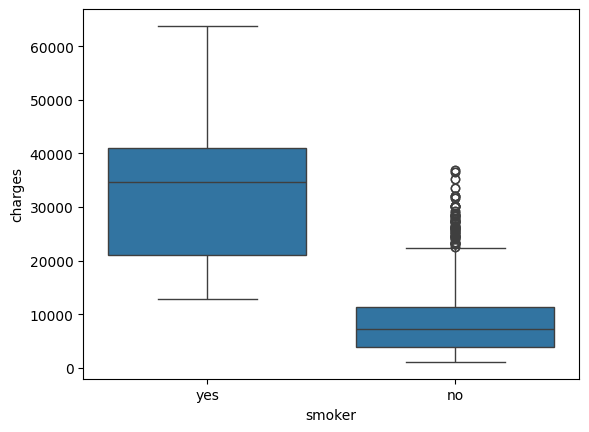

In [59]:
sns.boxplot(x='smoker', y='charges', data=df)
plt.show()